In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# import ctools
# import cscripts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
meV2erg=1.6e6

In [3]:
grb_delays=np.genfromtxt("VERITAS_GRB_Observations_All_bursts.csv", delimiter=',',names=True,dtype=[('GRB_Name', 'S6'), ('Delay_seconds', '<f8')], usecols=(0,24),skip_footer=14)

In [4]:
current_array = grb_delays['GRB_Name']
desired_array = np.array([(numeric_string).decode('utf-8') for numeric_string in current_array])

In [5]:
min_index=np.where(grb_delays['Delay_seconds']==min(grb_delays['Delay_seconds']))
max_index=np.where(grb_delays['Delay_seconds']==max(grb_delays['Delay_seconds']))

In [6]:
n = 2
year=np.empty(len(desired_array))
month=np.empty(len(desired_array))
day=np.empty(len(desired_array))
dates=[]
for j in range(len(desired_array)):
    line=desired_array[j]
    year[j],month[j],day[j]=[line[i:i+n] for i in range(0, len(line), n)]
    dates.append(datetime.date(int(year[j])+2000,int(month[j]),int(day[j])))

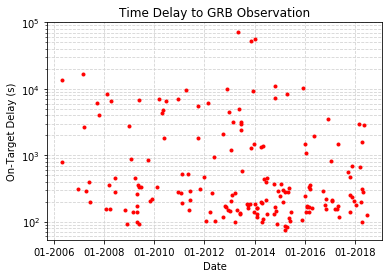

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Date")
ax.set_ylabel("On-Target Delay (s)")
ax.set_yscale('log')
plt.plot_date(dates,grb_delays['Delay_seconds'],color='r',marker='.')

    # ax.set_ylim([70,100])
    # ax.set_xlim([mdates.date2num(datetime.date(2015,1,1)),
    # mdates.date2num(datetime.date(2015,12,31))])

plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

datetimefmt = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(datetimefmt)

plt.title("Time Delay to GRB Observation")
plt.savefig("GRB_time_delay.pdf")

# plt.annotate("Min = {}s".format(grb_delays['Delay_seconds'][min_index]),
#              (mdates.date2num(dates[min_index[0][0]]),grb_delays['Delay_seconds'][min_index]),
#             arrowprops=dict(arrowstyle='-|>'))
# plt.annotate("Max = {}s".format(grb_delays['Delay_seconds'][max_index]),
#              (mdates.date2num(dates[max_index[0][0]]),grb_delays['Delay_seconds'][max_index]),
#             arrowprops=dict(arrowstyle='-|>'))

In [21]:
mdates.date2num(datetime.date(2015,1,1))
mdates.date2num(datetime.date(2015,12,31))

735599.0
735963.0


[]

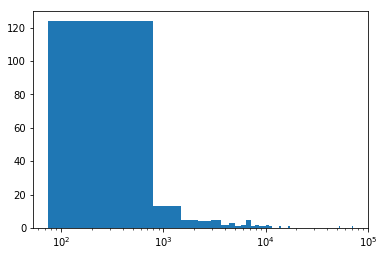

In [15]:
plt.hist(grb_delays["Delay_seconds"], bins=100)
# plt.hist(grb_delays["Delay_seconds"], bins=int(np.sqrt(len(grb_delays['Delay_seconds']))))
plt.semilogx()